In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Load the dataset into python environment & Make PassengerId’ as the index column

In [10]:
data = pd.read_csv('E:/Python programming/Case Studies/CS#5/titanic_dataset.csv', index_col = 'PassengerId')

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the basic details of the dataset

In [13]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
data.shape

(891, 11)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Fill in all the missing values present in all the columns in the dataset

In [16]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

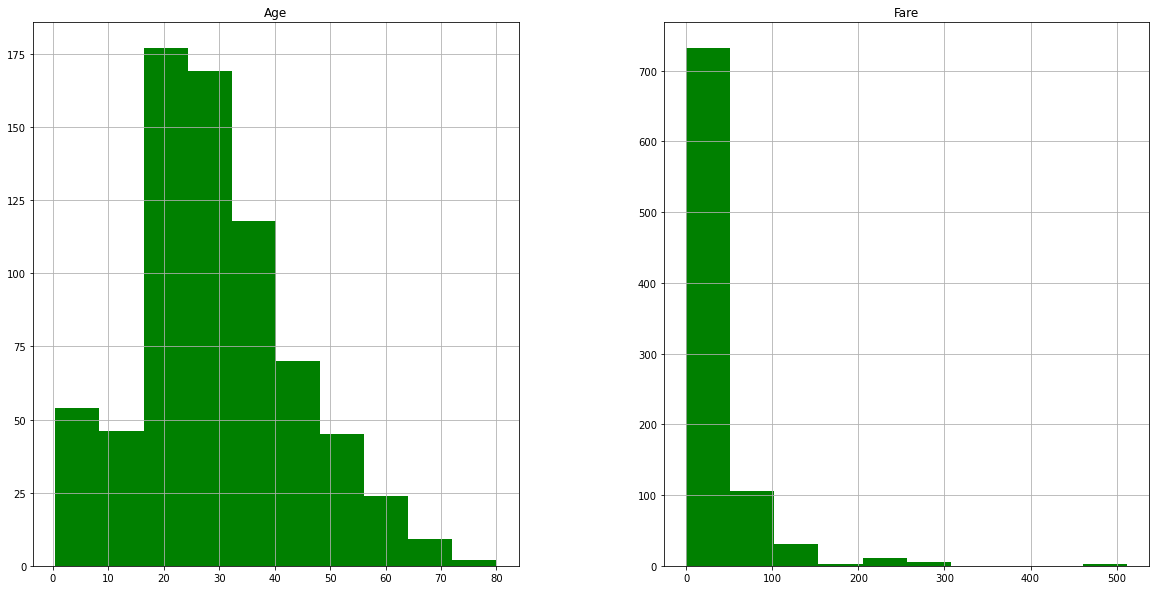

In [22]:
freqgraph = data.select_dtypes(include=['float'])     
freqgraph.hist(figsize=(20,10), color="Green")
plt.show()

In [23]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [24]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
data.Cabin.nunique()

147

In [26]:
data.Embarked.nunique()

3

In [27]:
data.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [28]:
data.Embarked.mode()

0    S
dtype: object

In [29]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [30]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [31]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [32]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle outliers in at least 3 columns in the dataset

In [33]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Text(0.5, 1.0, 'Box plot of Pclass')

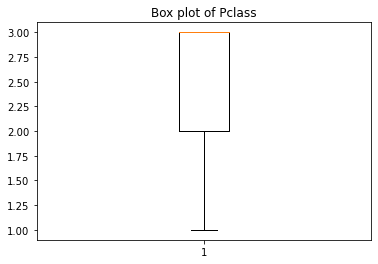

In [34]:
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

Text(0.5, 1.0, 'Box plot of Age')

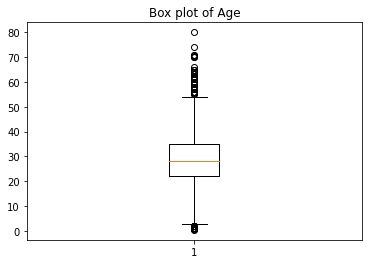

In [35]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [36]:
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['Age'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 

In [37]:
print(low_lim)
print(up_lim)

2.5
54.5


In [38]:
outlier =[] 
for x in data['Age']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [39]:
ind1 = data['Age']<low_lim
data.loc[ind1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [40]:
ind2 = data['Age']>up_lim
data.loc[ind2].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [41]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832, 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

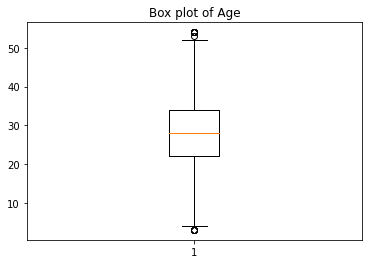

In [42]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [43]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Text(0.5, 1.0, 'Box plot of SibSp')

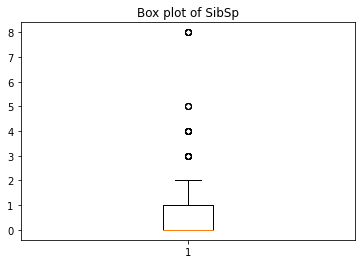

In [44]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [45]:
Q1 = np.percentile(data['SibSp'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['SibSp'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['SibSp'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 

In [46]:
ind1 = data['SibSp']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64', name='PassengerId')

In [47]:
ind2 = data['SibSp']>up_lim
data.loc[ind2].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [48]:
data.drop([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864], inplace=True)

In [49]:
data.shape

(786, 11)

In [50]:
data = pd.get_dummies(data)

In [51]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Do min max scaling on the feature set (Take ‘Survived’ as target)

In [52]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [53]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,...,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,2.318066,29.114504,0.311705,0.296438,30.295599,0.001272,0.001272,0.001272,0.001272,0.001272,...,0.002545,0.002545,0.003817,0.001272,0.001272,0.003817,0.001272,0.193384,0.089059,0.717557
std,0.828231,9.814762,0.527743,0.757073,48.962228,0.035669,0.035669,0.035669,0.035669,0.035669,...,0.050411,0.050411,0.061701,0.035669,0.035669,0.061701,0.035669,0.395203,0.285010,0.450474
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.125000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,34.000000,1.000000,0.000000,27.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 

In [56]:
X = min_max_scaler.fit_transform(X)

In [57]:
X = pd.DataFrame(X)

In [58]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,...,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.659033,0.512049,0.155852,0.049406,0.059133,0.001272,0.001272,0.001272,0.001272,0.001272,...,0.002545,0.002545,0.003817,0.001272,0.001272,0.003817,0.001272,0.193384,0.089059,0.717557
std,0.414115,0.192446,0.263871,0.126179,0.095568,0.035669,0.035669,0.035669,0.035669,0.035669,...,0.050411,0.050411,0.061701,0.035669,0.035669,0.061701,0.035669,0.395203,0.285010,0.450474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.394608,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.490196,0.000000,0.000000,0.025374,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.607843,0.500000,0.000000,0.054164,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
